In optimizing the data input pipeline for our training model, we implement a data generator. For our project, we choose a batch size of 16 images to ensure computational efficiency during the training phase. However, to validate the correct functionality of our function, we perform experiments using a reduced batch size of 2.

In [14]:
#from tifffile import imsave, imread
import os
import numpy as np
from matplotlib import pyplot as plt
import random
from Batch_functions import imageLoader

Let's test the generator and see if we have any problem 

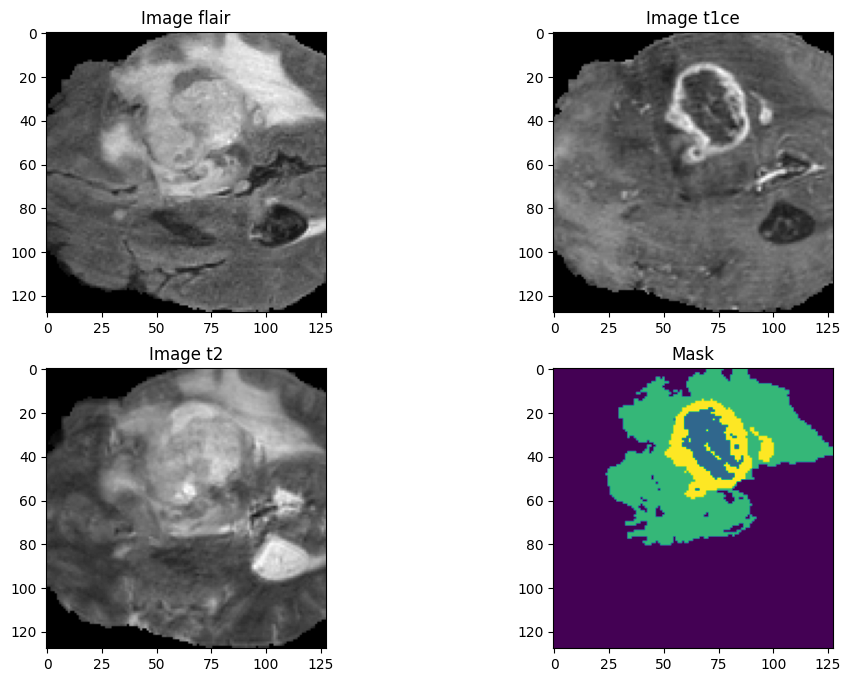

In [25]:
train_img_dir = 'd:/BraTS2020/input_data_3channels/images/'
train_mask_dir = 'd:/BraTS2020/input_data_3channels/masks/'
train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

batch_size = 2

train_img_datagen = imageLoader(train_img_dir, train_img_list, 
                                train_mask_dir, train_mask_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()
img, msk = train_img_datagen.__next__()


img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()